In [1]:
"""
Conditioning routine for sgy -  Final
"""
import os
import re
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import segyio
from PIL import Image
import datetime
import cv2
from scipy.signal import find_peaks

plt.rcParams.update({'font.size': 1})

os.chdir("..")
os.chdir(os. getcwd() + "\\src")
from c import ROOT_DIR

from mseisML_utils import *


C:\Users\sauce\OneDrive\Desktop\mseisML\src
C:\Users\sauce\OneDrive\Desktop\mseisML\segy\ABstg06


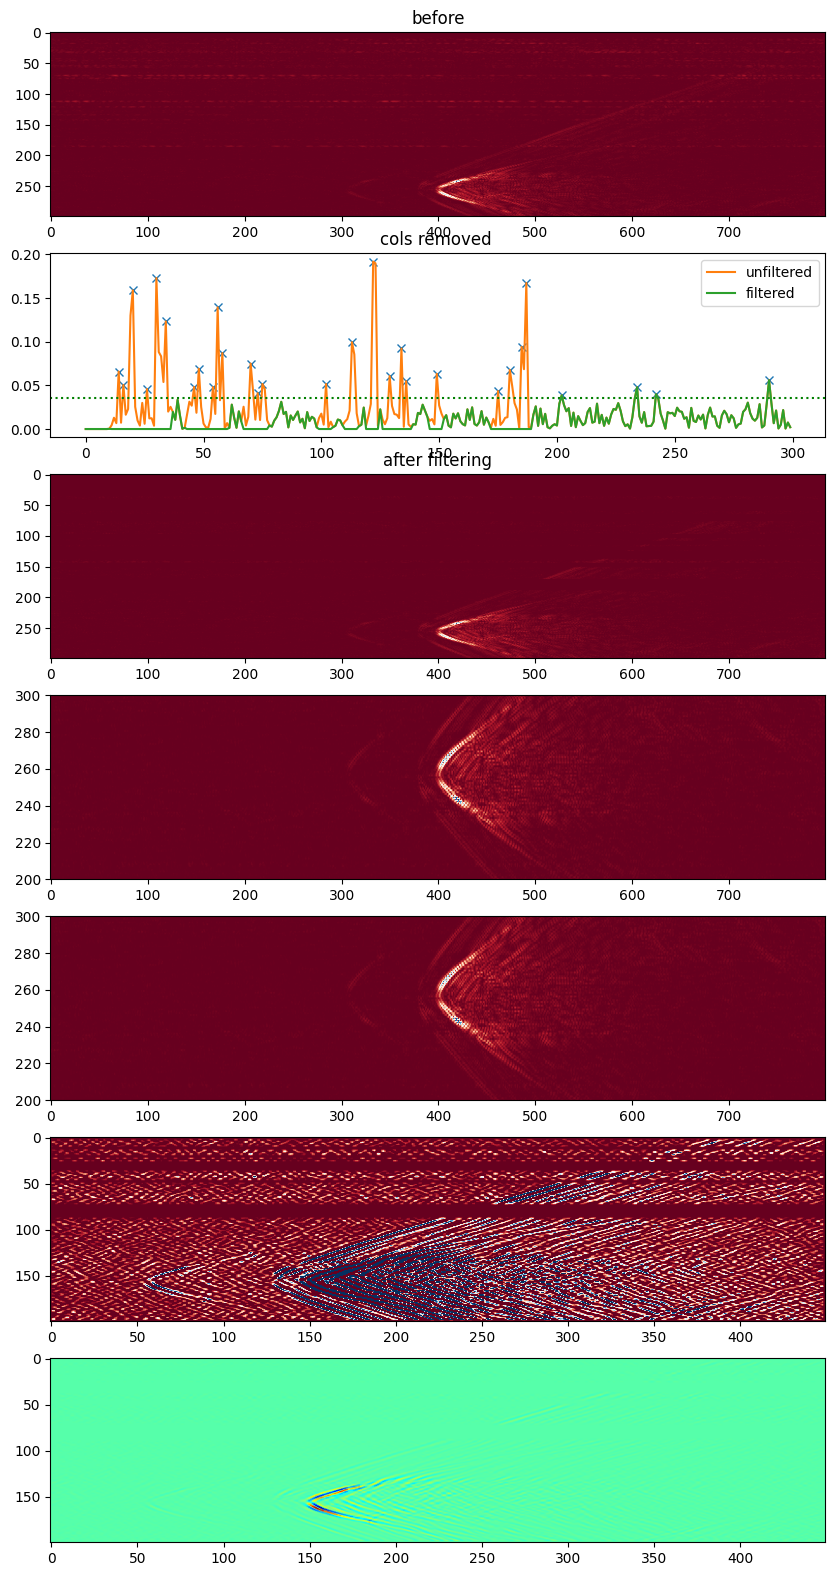

shape of new im: (300, 800)


In [2]:
# get current dir

print(os.getcwd())

# change directory to segy data folder

os.chdir(ROOT_DIR + "\\segy\\ABstg06")

print(os.getcwd())
file_path = '06_04_2022_MDT_01290evt.sgy'
#file_path = '06_04_2022_MDT_01460evt.sgy'
#file_path = '06_04_2022_MDT_01267evt.sgy'
#file_path = '06_04_2022_MDT_01268evt.sgy'

# look
show_conditioned_sgy_image(file_path)
cond = make_conditioned_sgy_image(file_path)
print('shape of new im:', np.shape(cond))

# save it

im = Image.fromarray((cond))

save_image_path = ROOT_DIR
now = datetime.datetime.now() # current date and time
dt = now.strftime('%m%d%Y%H%M%S')

#os.chdir(save_image_path)

im.save(save_image_path + dt + '.tif')

06_04_2022_MDT_01227evt.sgy


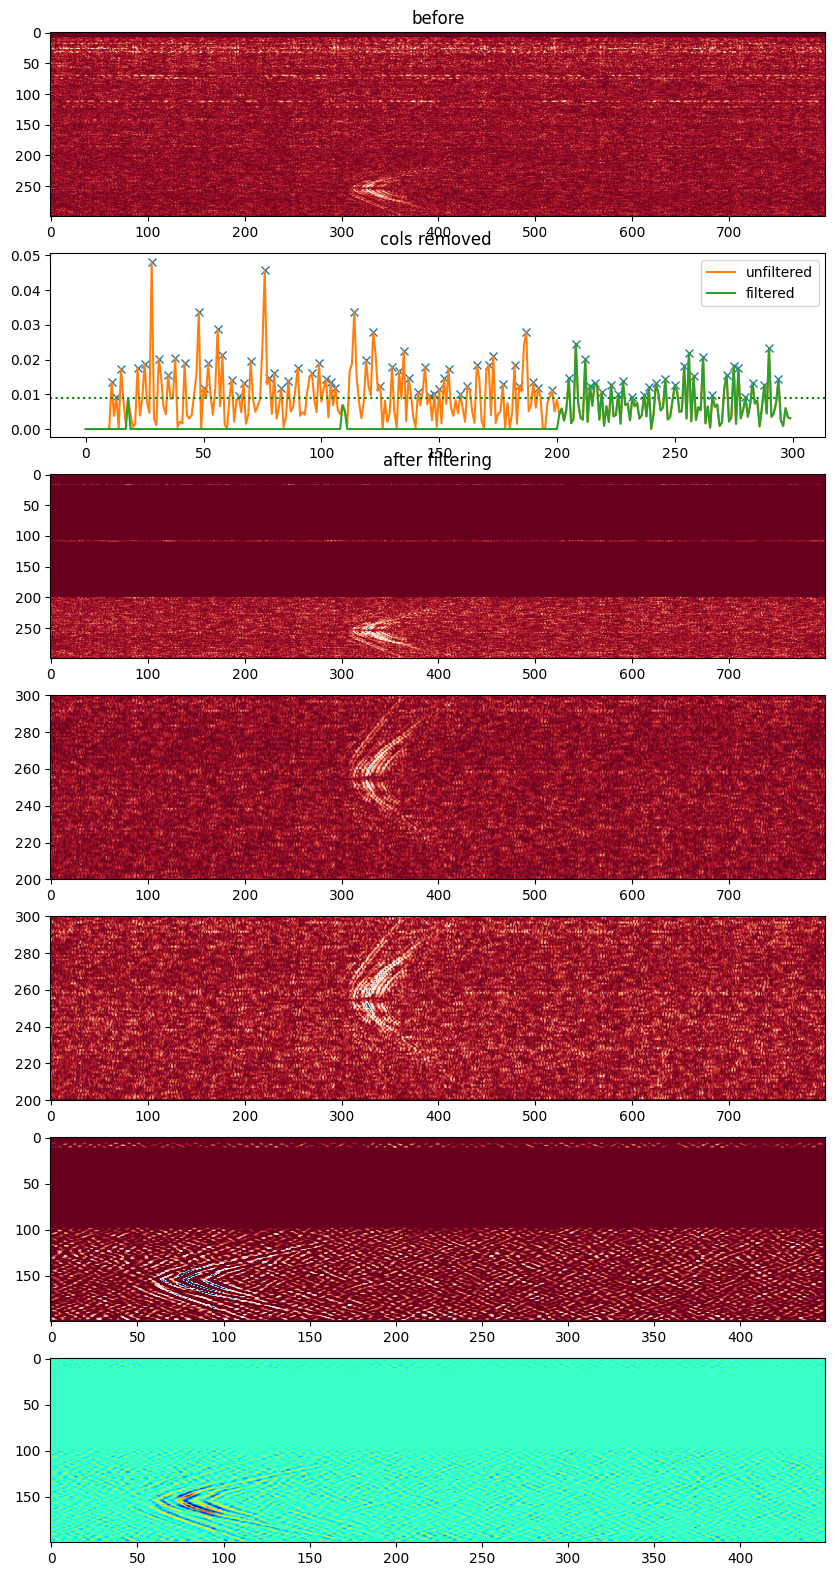

06_04_2022_MDT_01229evt.sgy


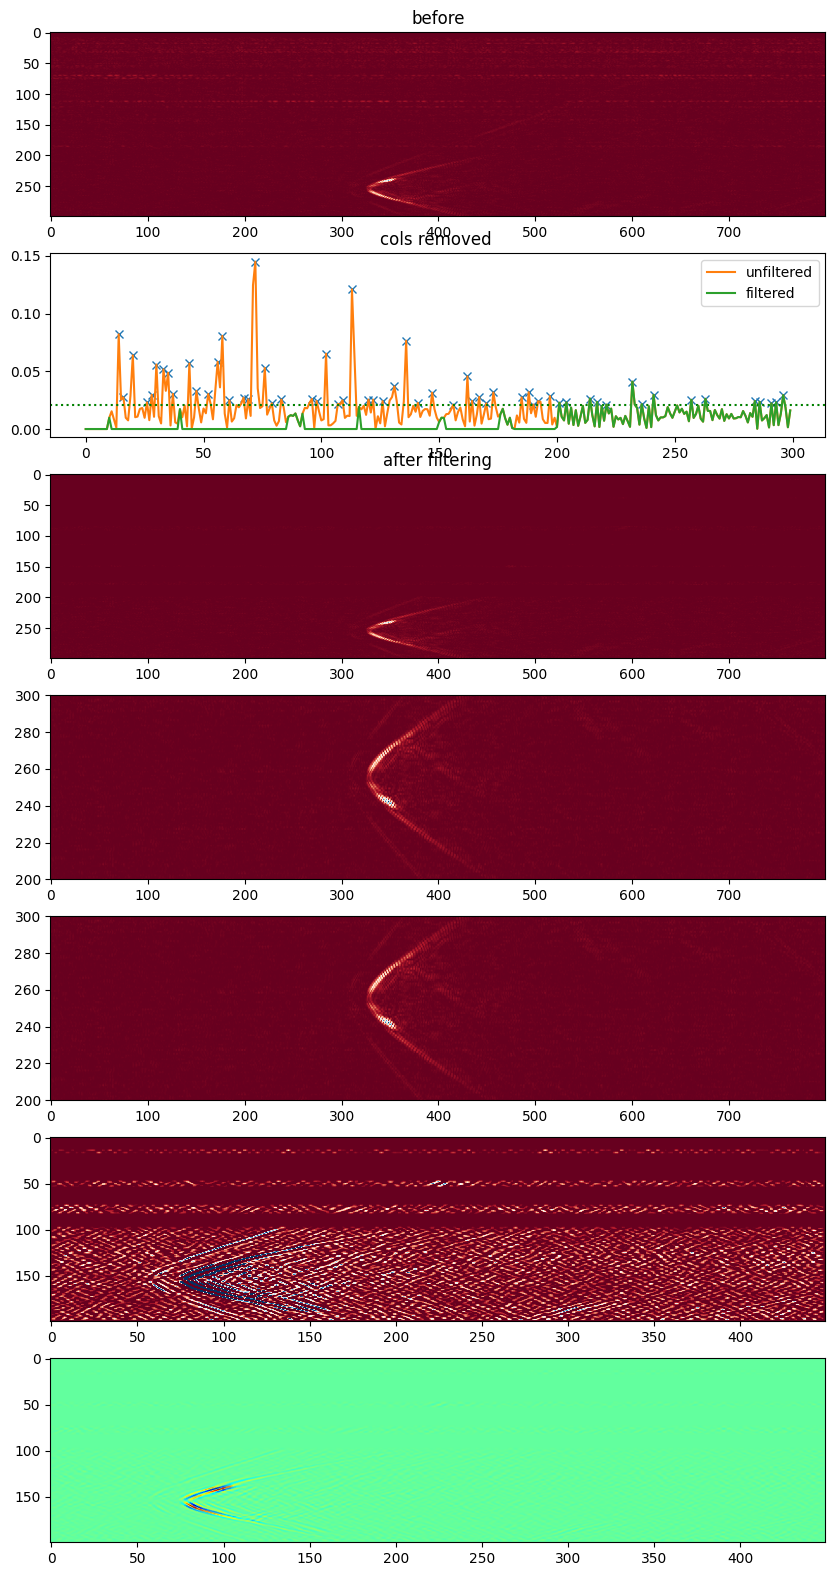

06_04_2022_MDT_01230evt.sgy


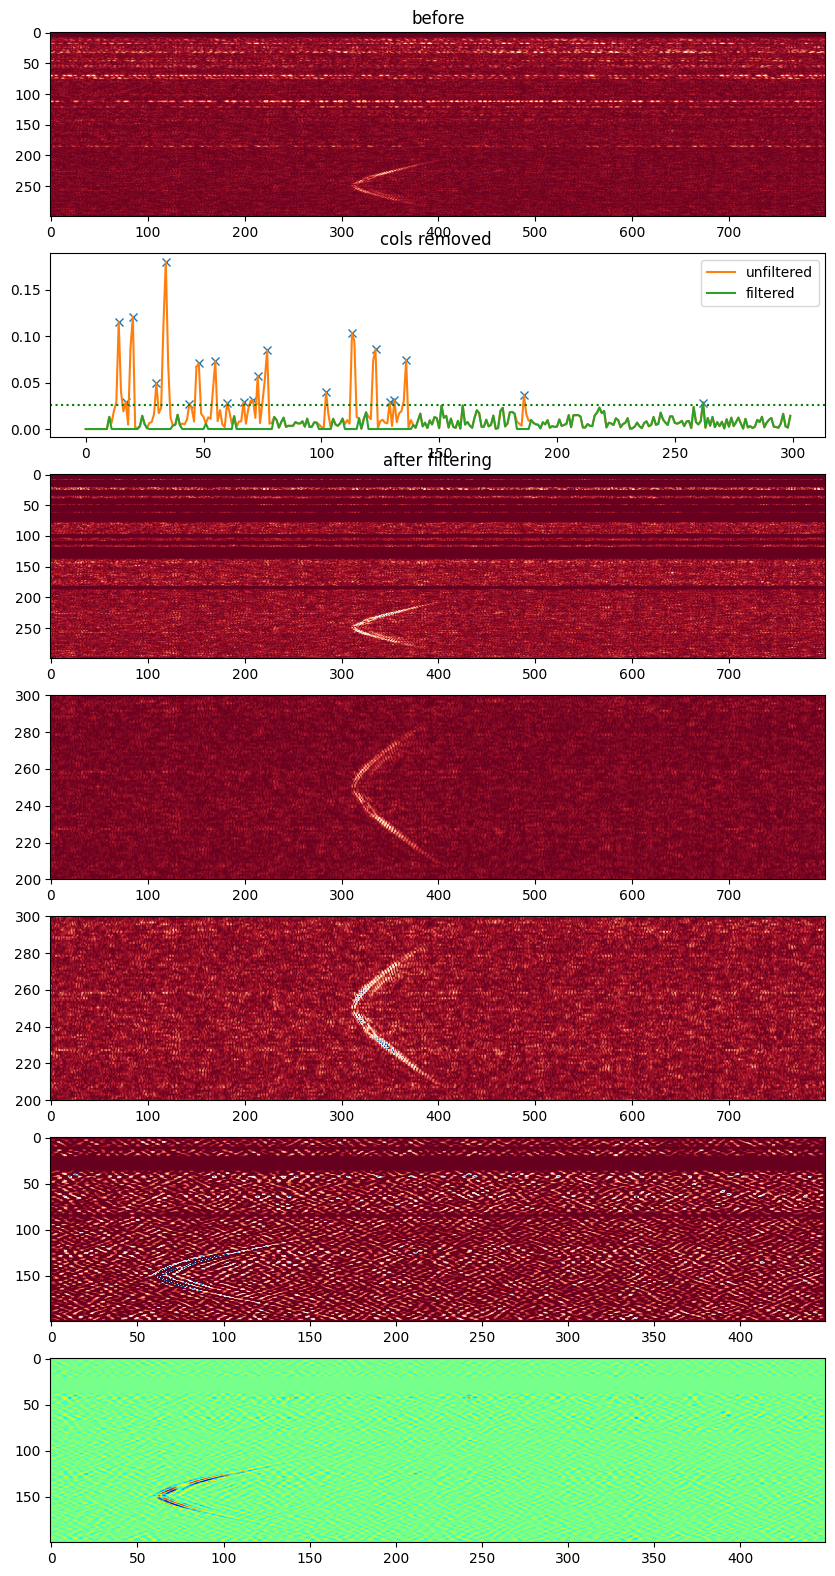

06_04_2022_MDT_01231evt.sgy


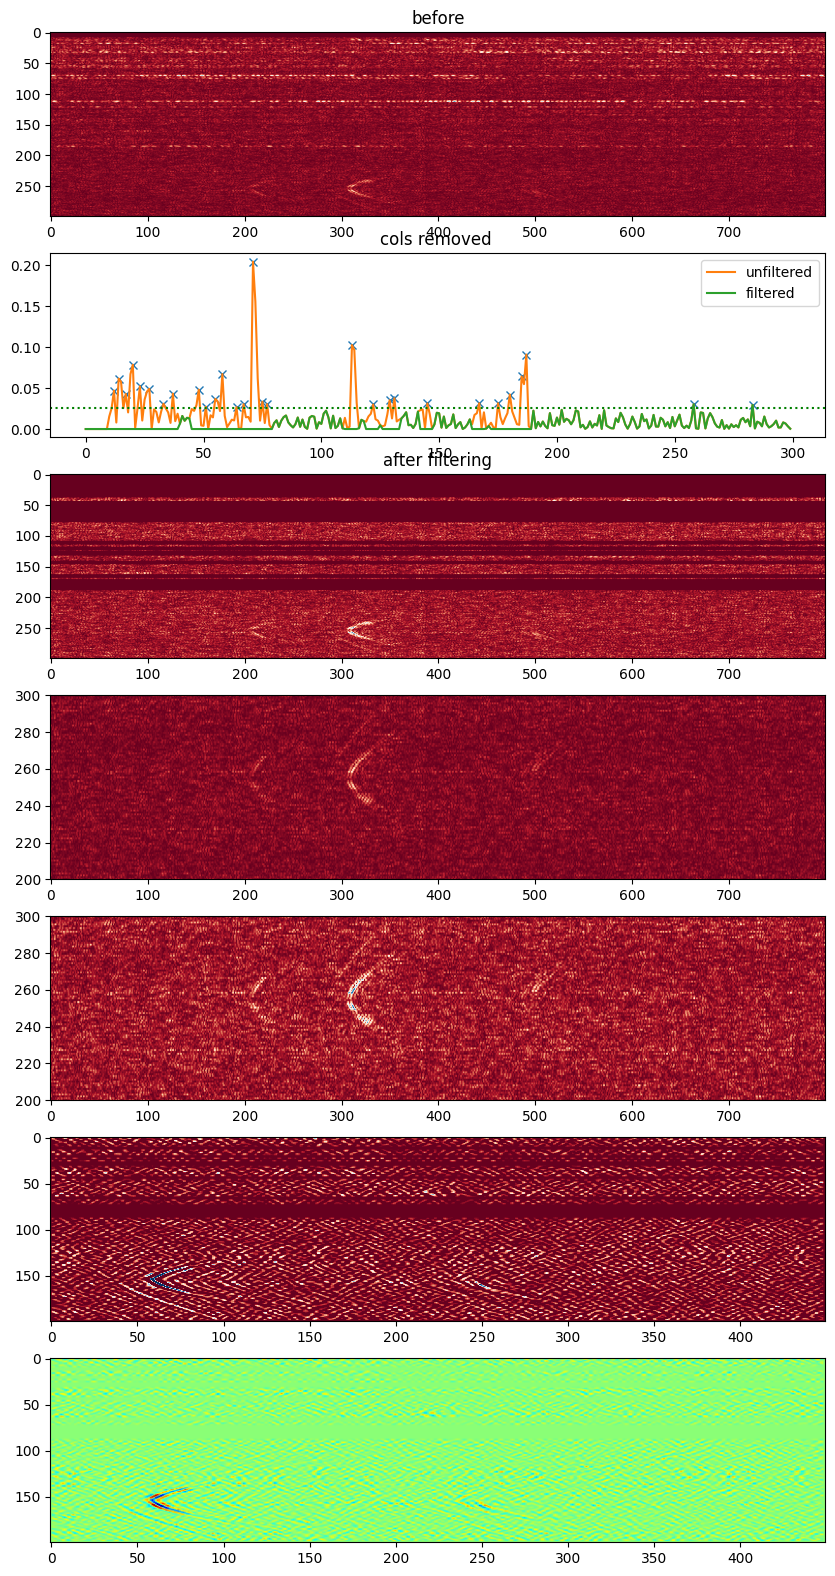

06_04_2022_MDT_01233evt.sgy


KeyboardInterrupt: 

In [3]:
# The list of items
files = os.listdir(os.getcwd())
#print(files)
 
# Loop to print each filename separately
for filename in files:
    print(filename)
    make_conditioned_sgy_image(filename)
    show_conditioned_sgy_image(filename)


In [ ]:
# identify event object
#file_path = '06_04_2022_MDT_01268evt.sgy'
raw = make_raw_sgy_image(file_path)
cond = make_conditioned_sgy_image(file_path)
sobelxy = cv2.Sobel(src=cond, ddepth=cv2.CV_64F, dx=1, dy=1, ksize=5) # Combined X and Y Sobel Edge Detection

fig, ax = plt.subplots(nrows=3, ncols=1,figsize=(10,10), dpi=100)

ax[0].imshow(raw, cmap="RdBu", vmin=0,vmax=255,aspect='auto')
ax[1].imshow(cond, cmap="RdBu", vmin=0,vmax=255,aspect='auto')
ax[2].imshow(sobelxy, cmap="RdBu", vmin=0,vmax=255,aspect='auto')

plt.show()